# Exploration des données

Dans le cadre de ce projet, nous allons étudier une base de données constituées d'informations sur les clients et les commandes passées sur des marketplaces en ligne. L'objectif de ce projet est de proposer une segmentation des clients afin d'orienter la société Olist pour leurs campagnes de communication. 

Dans cette première partie, nous allons procéder à l'exploration, la description et le nettoyage de ces données afin de pouvoir les traiter correctement par la suite.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Exploration des différents datasets

In [2]:
# Commençons par importer la base de données afin de l'explorer
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Regardons maintenant un à un ces datasets afin de comprendre leur fonctionnement et leurs relations.

#### Orders

In [3]:
# On commence par le dataset principal
display(orders.head())
display(orders.info())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

Le dataset *Orders* donne des informations sur toutes les commandes passées sur le marketplace. Chaque commande possède une identifiant unique contenu dans la colonne *order_id*, associé à un identifiant client unique pour chaque commande : *customer_id*. On trouve ensuite une colonne indiquant le statut de la commande (livré/envoyé/en cours...). On a ensuite des dates, indiquant l'horaire précis d'achat et de paiement, suivi de la date à laquelle la commande a été remise au distributeur puis au client, et finalement la date estimée d'arrivée de la commande.

On voit quelques valeurs manquantes sur notre dataset, du au fait que certaines commandes n'ont peut être pas eu le temps d'être approuvées avant la coupure temporelle de notre dataset, de même que des commandes n'ont donc pas eu le temps d'être livrées. On pourrait donc uniquement conserver les commandes qui ont été livrées, afin de ne pas traiter des commandes "invalides".

In [4]:
orders = orders.loc[orders['order_status']=='delivered']
orders.reset_index(drop=True,inplace=True)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


On voit qu'il nous reste encore très peu de valeurs manquantes, on va donc également retirer ces lignes pour être sûr.

In [6]:
orders.dropna(inplace=True)
orders.reset_index(drop=True,inplace=True)

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 5.9+ MB


#### Customers

In [8]:
display(customers.head())
display(customers.info())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

Le dataset *Customers* donne des informations sur les clients de notre marketplace. Il possède 2 variables pour identifier le client : *customer_id*, qui correspond à l'identifiant unique pour chaque commande qu'on retrouvait dans *Orders*, ainsi que *customer_unique_id*, qui est cette fois l'identifiant unique pour chaque client. On a ensuite des informations sur le client tels que son code postal, sa ville et son état de résidence.

On constate des zipcodes avec uniquement 4 chiffres, alors que les codes postaux au Brésil possèdent normalement 5 chiffres. En fait, comme les zipcode est considéré comme un entier lors de l'importation, il retire le premier 0 correspondant aux codes postaux de la région de Sao Paulo. On va donc changer le type de cette colonne et corriger ces erreurs.

In [9]:
# On change le type de la colonne
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(str)

# On remet les 0 en première position sur les lignes où ils manquent
customers.loc[customers['customer_zip_code_prefix'].str.len() == 4,'customer_zip_code_prefix'] = '0' + customers.loc[customers['customer_zip_code_prefix'].str.len() == 4,'customer_zip_code_prefix']
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Chaque ligne correspond à une commande car les *customer_id* sont uniques, donc on va retirer les mêmes que précédemment.

In [10]:
customers = customers.loc[customers['customer_id'].isin(orders['customer_id'])]
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
0b11c9f6e42b73fd9c3c84f3b919701b     1
01da270abab6215a40467414afae12d1     1
baad4c06e7feffd0e2849ab8bbb6286c     1
19fc9fd84b7447d294ccb87622210a30     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 93336, dtype: int64


<AxesSubplot:xlabel='customer_unique_id', ylabel='Count'>

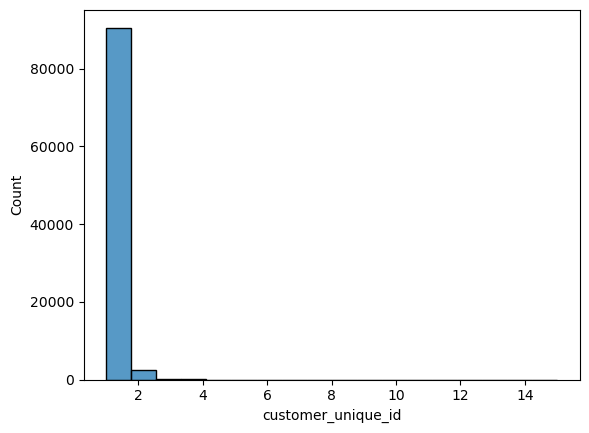

In [11]:
print(customers['customer_unique_id'].value_counts())
sns.histplot(customers['customer_unique_id'].value_counts())

On peut voir ici que malgré nos 96455 commandes, on a 93336 clients uniques, c'est à dire que seulement 3% de nos clients commandent plus qu'une fois.

#### Payments

In [12]:
display(order_payments.head())
display(order_payments.info())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

Dans le dataset *Payments*, on retrouve *order_id* qui vient faire le lien sur chaque commande unique. On a ensuite la variable *payment_sequential* qui indique la séquence de paiement dans le cas où un client paye une commande avec plusieurs méthodes de paiement, qui sont indiqués dans la variable *payment_type*. La variable *payment_installments* indique le nombre de paiements dans le cas où le client souhaite étaler son paiement sur une certaine durée. Enfin on obtient pour chacun de ces paiement la valeur payée correspondante.

In [13]:
#On garde une nouvelle fois uniquement les lignes correspondantes aux commandes qu'on garde
order_payments = order_payments.loc[order_payments['order_id'].isin(orders['order_id'])]
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
order_payments.describe()['payment_value']

count    100733.000000
mean        153.067359
std         214.471078
min           0.000000
25%          56.780000
50%         100.000000
75%         171.290000
max       13664.080000
Name: payment_value, dtype: float64

On voit que la plupart des commandes ont des prix plutôt bas, avec une mediane à 100 BRL, soit environ 18€ alors qu'on a un max à 13000BRL soit plus de 2000€.

In [15]:
order_payments.loc[order_payments['payment_value']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


On a quelque valeurs nulles pour le payment, mais elles correspondent à des paiements par voucher, qui viennent sûrement réduire le prix de certains produits d'où les paiements égaux à 0, ce n'est donc pas un problème.

#### Reviews

In [16]:
display(order_reviews.head())
display(order_reviews.info())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

Chaque commentaire dans le dataset *Reviews* possède un identifiant unique, il est relié à l'*order_id* de la commande. On retrouve ensuite des informations sur le commentaire, tels que la notre qui a été attribuée, le titre et le contenu du message. On a ensuite deux dates, celle à partir de laquelle le client a pu laisser un commentaire, et celle à laquelle il l'a envoyé.

On peut voir que pour chaque commande, une ligne est crée dans le dataset *Reviews*, en revanche moins de la moitié des clients laissent un commentaire. De plus, les commandes avec plus d'un produit ont des lignes de review pour chaque produit acheté. On procède au même tri que sur les commandes.

In [17]:
order_reviews = order_reviews.loc[order_reviews['order_id'].isin(orders['order_id'])]
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Order Items

In [18]:
display(order_items.head())
display(order_items.info())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

In [19]:
len(order_items['order_id'].unique())

98666

Le dataset *Order Items* indique le détail des produits contenus dans chaque commande, on y retrouve *order_id* qui fait le lien avec le dataset *Orders*. On a ensuite *order_item_id* qui indique l'ordre des différents produits au sein d'une même commande, avec son *product_id* unique associé. On a également le *seller_id* unique pour chaque vendeur, ainsi que la date limite d'envoi de la commande. Enfin, on trouve le prix associé à chaque produit, ainsi que les frais de ports, dont le total est indiqué en cas de commande d'un même produit.

On remarque cependant que la quantité de commandes ne correspond pas avec celui de *Orders*, toutes les commandes ne sont donc pas détaillées. On va refaire un tri sur les commandes livrées.

In [20]:
order_items = order_items.loc[order_items['order_id'].isin(orders['order_id'])]
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
len(order_items['order_id'].unique())

96455

On a bien cette fois ci le même nombre de commandes uniques que dans notre dataset *Orders*.

#### Products

In [22]:
display(products.head())
display(products.info())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

Le dataset *Products* donne des informations sur l'ensemble des produits vendus, on y trouve donc le *product_id* correspondant dans le dataset *Order Items*, suivie de ses caractéristiques. On a donc ainsi sa catégorie, le nombre de caractères contenus dans son nom et sa description, la quantité de photos publiés sur l'annonce, et enfin le poids et les dimensions du produit.

En s'intéressant au nombres de lignes, on constate que certains produits ne possèdent ni de catégorie, ni de nom, ni de description. On va les garder pour l'instant.

In [23]:
#Il y a des fautes d'orthographes sur les colonnes, je les corrige pour plus de facilité lors de l'utilisation de ces colonnes
products.rename({'product_name_lenght' : 'product_name_length','product_description_lenght':'product_description_length'},axis=1,inplace=True)

In [24]:
products.loc[products['product_name_length'].isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [25]:
#On crée une variable contenantn les produits concernés si on souhaite les retirer plus tard
missing_products = products.loc[products['product_name_length'].isna()]['product_id']

#### Sellers

In [26]:
display(sellers.head())
display(sellers.info())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

Le dataset *Sellers* donne des informations sur les vendeurs. On y trouve le *seller_id* comme dans *Order Items*, ainsi que le code postal, la ville et l'état de résidence du vendeur.

De même que chez les customers, on retrouve un problème au niveau des codes postaux commençant par un 0, on règle donc ce problème.

In [27]:
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype(str)
sellers.loc[sellers['seller_zip_code_prefix'].str.len() == 4,'seller_zip_code_prefix'] = '0' + sellers.loc[sellers['seller_zip_code_prefix'].str.len() == 4,'seller_zip_code_prefix']
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,04650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


#### Geolocation

In [28]:
display(geolocation.head())
display(geolocation.info())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

Enfin, le dataset *Geolocation* apporte des informations plus précises sur les différents code postaux présents dans les datasets *Sellers* et *Customers*, en ajoutant la latitude et la longitude pour chaque code. On retrouve également la ville et l'état.

In [29]:
geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].astype(str)
geolocation.loc[geolocation['geolocation_zip_code_prefix'].str.len() == 4,'geolocation_zip_code_prefix'] = '0' + geolocation.loc[geolocation['geolocation_zip_code_prefix'].str.len() == 4,'geolocation_zip_code_prefix']
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


## Création des Features

Avant de merge nos différentes tables ensemble, on d'abord procéder à un traitement afin de les uniformiser pour faciliter les choses. En effet on a pu remarquer que tous nos datasets ne contiennent pas le même nombre de lignes,  car les commandes uniques sont divisées en plusieurs lignes notamment pour les paiements ou les détails de commande. On va donc agréger ces datasets dans un premier temps afin de ne pas avoir de doublons, et en sélectionnant les features qui nous intéressent.

Dans un premier temps, on va travailler en utilisant la méthode RFM. On va donc calculer la **Récence**, la **Fréquence** et le **Montant**. Pour cela on va avoir besoin des tables *Customers*,*Orders* et *Payments*.

Commençons par agréger le dataset *Payments*, pour cela on va grouper par *order_id* et additionner les *payment_value* afin d'obtenir la somme totale payée pour chaque commande.

In [30]:
# On effectue un groupby sur le numéro de commande et on additionne les montants
montants = order_payments[['order_id','payment_value']].groupby('order_id', as_index=False).sum()
montants.rename({'payment_value':'total_payment'},axis=1,inplace=True)
montants

,order_id,total_payment
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
96449,fffc94f6ce00a00581880bf54a75a037,343.40
96450,fffcd46ef2263f404302a634eb57f7eb,386.53
96451,fffce4705a9662cd70adb13d4a31832d,116.85
96452,fffe18544ffabc95dfada21779c9644f,64.71


On a maintenant plus de doublons dans ce dataset, et on va pouvoir le joindre directement à *Orders*. Avant cela on va simplement faire un tri sur les features afin de garder seulement ce qui nous intéresse. On a déjà les montants avec ce qu'on a fait, il nous manque donc la récence, pour ça on va garder *order_purchase_timestamp* dans *Orders*, ainsi que la fréquence, qu'on va obtenir grâce à *customer_unique_id* contenue dans *Customers*.

Pour obtenir les informations qu'on recherche par client, on va devoir merge sur *customer_unique_id* plutôt que sur *customer_id*. On va donc devoir agréger *Orders* pour correspondre à *Customers*.

In [31]:
# On merge Orders avec Montants pour avoir les paiements par commande
merge_1 = orders[['order_id','customer_id','order_purchase_timestamp']].merge(montants,on='order_id')



#On merge ensuite avec Customers afin d'avoir les clients uniques
merge_1 = merge_1.merge(customers[['customer_id','customer_unique_id']],on='customer_id')
merge_1

,order_id,customer_id,order_purchase_timestamp,total_payment,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,38.71,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,72.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,28.62,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...
96449,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,85.08,6359f309b166b0196dbf7ad2ac62bb5a
96450,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,195.00,da62f9e57a76d978d02ab5362c509660
96451,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,271.01,737520a9aad80b3fbbdad19b66b37b30
96452,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,441.16,5097a5312c8b157bb7be58ae360ef43c


On remarque qu'on a perdu une ligne, car une des commandes n'était pas référencée dans le dataset de paiements.

In [32]:
# On peut déjà calculer la quantité de commande par client
frequence = pd.DataFrame(merge_1['customer_unique_id'].value_counts())
frequence.reset_index(inplace=True)
frequence.rename({'customer_unique_id':'count','index':'customer_unique_id'}, axis=1,inplace=True)
frequence

,customer_unique_id,count
0,8d50f5eadf50201ccdcedfb9e2ac8455,15
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,6469f99c1f9dfae7733b25662e7f1782,7
...,...,...
93330,b4d20e099c1aadc325ac4b8bdb309cd6,1
93331,3ed4235d521c24fec4f77d4254e070b8,1
93332,11a70f262b8ebca18b88fcb5a5f6882b,1
93333,20ea80f41970eeef262ab9d652ed5255,1


In [33]:
# On prend la date max (= la date de la dernière commande) par client unique
dates = merge_1[['customer_unique_id','order_purchase_timestamp']].groupby('customer_unique_id',as_index=False).max()

# On prend comme référence la dernière commande du dataset
last_date  = dates['order_purchase_timestamp'].max()

# On calcule la récence (temps écoulé depuis la dernière commande)
dates['recence'] = pd.to_datetime(last_date) - pd.to_datetime(dates['order_purchase_timestamp'])
dates.drop('order_purchase_timestamp',axis=1,inplace=True)
dates

,customer_unique_id,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,111 days 04:04:10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114 days 03:49:10
2,0000f46a3911fa3c0805444483337064,536 days 17:55:34
3,0000f6ccb0745a6a4b88665a16c9f078,320 days 18:30:56
4,0004aac84e0df4da2b147fca70cf8255,287 days 19:14:55
...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,446 days 18:00:01
93331,fffea47cd6d3cc0a88bd621562a9d061,261 days 18:52:41
93332,ffff371b4d645b6ecea244b27531430a,567 days 23:11:21
93333,ffff5962728ec6157033ef9805bacc48,118 days 23:42:56


In [34]:
#On calcule maintenant le total de paiments par client en additionnant les commandes
total_payment = merge_1[['customer_unique_id','total_payment']].groupby('customer_unique_id',as_index=False).sum()
total_payment

,customer_unique_id,total_payment
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
93331,fffea47cd6d3cc0a88bd621562a9d061,84.58
93332,ffff371b4d645b6ecea244b27531430a,112.46
93333,ffff5962728ec6157033ef9805bacc48,133.69


In [35]:
RFM = frequence.merge(total_payment,on='customer_unique_id')
RFM = RFM.merge(dates,on='customer_unique_id')
RFM

,customer_unique_id,count,total_payment,recence
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,8 days 19:46:11
1,3e43e6105506432c953e165fb2acf44c,9,1172.66,182 days 20:23:58
2,ca77025e7201e3b30c44b472ff346268,7,1122.72,89 days 03:22:08
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,196 days 01:38:25
4,6469f99c1f9dfae7733b25662e7f1782,7,758.83,62 days 14:17:03
...,...,...,...,...
93330,b4d20e099c1aadc325ac4b8bdb309cd6,1,171.08,104 days 21:29:00
93331,3ed4235d521c24fec4f77d4254e070b8,1,871.26,235 days 05:05:48
93332,11a70f262b8ebca18b88fcb5a5f6882b,1,163.95,111 days 22:00:52
93333,20ea80f41970eeef262ab9d652ed5255,1,222.86,536 days 17:09:48


On va maintenant pouvoir retirer *customer_unique_id* et procéder au k-means. On va également standardiser nos valeurs afin d'avoir une échelle commune entre les 3 features pour un résultat équilibré.

In [36]:
# On place l'id client en index
RFM.index = RFM['customer_unique_id']
RFM.drop('customer_unique_id',axis=1,inplace=True)

# On transforme le datetime en valeur en secondes
RFM ['recence'] = RFM['recence'].apply(lambda x : x.days)

# On applique le standar scaler
std  = StandardScaler()
std_RFM = pd.DataFrame(std.fit_transform(RFM))
std_RFM

,0,1,2
0,66.794589,3.154931,-1.500533
1,38.099844,4.451197,-0.359886
2,28.534929,4.230551,-0.969542
3,28.534929,3.507241,-0.268109
4,28.534929,2.622798,-1.146539
...,...,...,...
93330,-0.159817,0.025980,-0.871210
93331,-0.159817,3.119541,-0.012447
93332,-0.159817,-0.005522,-0.825322
93333,-0.159817,0.254756,1.960741


In [37]:
RFM

,count,total_payment,recence
customer_unique_id,,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,8
3e43e6105506432c953e165fb2acf44c,9,1172.66,182
ca77025e7201e3b30c44b472ff346268,7,1122.72,89
1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,196
6469f99c1f9dfae7733b25662e7f1782,7,758.83,62
...,...,...,...
b4d20e099c1aadc325ac4b8bdb309cd6,1,171.08,104
3ed4235d521c24fec4f77d4254e070b8,1,871.26,235
11a70f262b8ebca18b88fcb5a5f6882b,1,163.95,111


On a donc constitué un dataset avec nos premières features **Récence**, **Fréquence** et **Montant**.

### Autres features

En plus de ces features on pourrait venir s'intéresser à d'autres afin d'entrer un peu plus dans les détails, on va donc créer en parallèle des datasets avec les *review_score* et un autre avec les *payment_installments* afin d'observer les résultats qu'on obtient.

#### Reviews

In [38]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Pour les reviews qui correspondent à la même commande, on prend la médiane des notes attribuées, puis on merge sur le dataset *Orders*.

In [39]:
reviews = order_reviews[['order_id','review_score']].groupby('order_id').median().merge(orders[['order_id','customer_id']],on='order_id',how='right')
reviews

,order_id,review_score,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,4.0,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,5.0,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,5.0,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,5.0,39bd1228ee8140590ac3aca26f2dfe00
96451,63943bddc261676b46f01ca7ac2f7bd8,4.0,1fca14ff2861355f6e5f14306ff977a7
96452,83c1379a015df1e13d02aae0204711ab,5.0,1aa71eb042121263aafbe80c1b562c9c
96453,11c177c8e97725db2631073c19f07b62,2.0,b331b74b18dc79bcdf6532d51e1637c1


On merge ensuite avec *Customers* pour avoir les clients uniques.

In [40]:
reviews = reviews.merge(customers[['customer_id','customer_unique_id']],on='customer_id',how='left')
reviews

,order_id,review_score,customer_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,5.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,5.0,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a
96451,63943bddc261676b46f01ca7ac2f7bd8,4.0,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660
96452,83c1379a015df1e13d02aae0204711ab,5.0,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30
96453,11c177c8e97725db2631073c19f07b62,2.0,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c


On regroupe enfin par *customer_unique_id* et on prend une nouvelle fois la médiane des notes attribuées pour chaque client.

In [41]:
reviews = reviews[['customer_unique_id','review_score']].groupby('customer_unique_id').median()
reviews

,review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


In [42]:
#On ajoute cette feature à notre RFM
RFM_2 = RFM.merge(reviews,on='customer_unique_id')
RFM_2

,count,total_payment,recence,review_score
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,8,5.0
3e43e6105506432c953e165fb2acf44c,9,1172.66,182,3.0
ca77025e7201e3b30c44b472ff346268,7,1122.72,89,5.0
1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,196,5.0
6469f99c1f9dfae7733b25662e7f1782,7,758.83,62,5.0
...,...,...,...,...
b4d20e099c1aadc325ac4b8bdb309cd6,1,171.08,104,5.0
3ed4235d521c24fec4f77d4254e070b8,1,871.26,235,5.0
11a70f262b8ebca18b88fcb5a5f6882b,1,163.95,111,5.0


In [43]:
RFM_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93335 entries, 8d50f5eadf50201ccdcedfb9e2ac8455 to 60350aa974b26ff12caad89e55993bd6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   count          93335 non-null  int64  
 1   total_payment  93335 non-null  float64
 2   recence        93335 non-null  int64  
 3   review_score   92732 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.6+ MB


On remarque qu'on a des valeurs manquantes sur notre nouvelle features, dûes au fait que certaines commandes n'ont pas reçues de notes. On va donc retirer ces quelques lignes.

In [44]:
#On vérifie qu'on ne retire pas trop de valeurs qui peuvent nous intéresser
RFM_2.loc[(RFM_2['review_score'].isna())&(RFM_2['count']>=2)]

,count,total_payment,recence,review_score
customer_unique_id,,,,
cb4f48aa5b4657435b012a65f2a122eb,2,963.25,193,NaN
e2226f481eef03f2876d1a27f0f4b1b0,2,711.89,365,NaN
2ca8ef8560c5cd0f9ddb65d1b1b51380,2,206.73,262,NaN
c55821f6a2a59a93d4cde13a2ec14661,2,400.95,378,NaN
e8bab621313ad2a3c0ce8e3a023ff9bb,2,492.26,342,NaN
79f227df52caf2b68d36e990ff3fc652,2,267.25,174,NaN
bd8ee6a65c4d647953792da821444580,2,413.61,272,NaN
b525fc8cce07342fb00ab3b2667c8eb9,2,263.50,275,NaN
367f4686d7112d69feed92b02a1775ed,2,205.50,466,NaN


In [45]:
RFM_2.dropna(inplace=True)
RFM_2.reset_index(drop=True,inplace=True)

On applique enfin un standard scaler sur notre dataset afin de standardiser nos valeurs.

In [46]:
std_RFM_2 = pd.DataFrame(std.fit_transform(RFM_2))
std_RFM_2

,0,1,2,3
0,66.652038,3.173757,-1.499393,0.660823
1,38.018286,4.477314,-0.358792,-0.901218
2,28.473702,4.255426,-0.968423,0.660823
3,28.473702,3.528049,-0.267020,0.660823
4,28.473702,2.638632,-1.145413,0.660823
...,...,...,...,...
92727,-0.160051,0.027210,-0.870096,0.660823
92728,-0.160051,3.138168,-0.011368,0.660823
92729,-0.160051,-0.004470,-0.824210,0.660823
92730,-0.160051,0.257272,1.961739,0.660823


#### Installments

Tout d'abord, on groupe par commande, puis on prend la somme des étalements pour les commandes qui ont été réglées avec plusieurs moyens de paiement, et on merge avec *Orders*.

In [47]:
installments = order_payments[['order_id','payment_installments']].groupby('order_id').median().merge(orders[['order_id','customer_id']],on='order_id',how='right')
installments = installments.merge(customers[['customer_id','customer_unique_id']],on='customer_id',how='left')
installments

,order_id,payment_installments,customer_id,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,3.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,3.0,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a
96451,63943bddc261676b46f01ca7ac2f7bd8,3.0,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660
96452,83c1379a015df1e13d02aae0204711ab,5.0,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30
96453,11c177c8e97725db2631073c19f07b62,4.0,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c


On prend ensuite la moyenne des étalements pour les clients ayant effectués plusieurs commandes.

In [48]:
installments = installments.groupby('customer_unique_id').mean()
installments

,payment_installments
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,8.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,6.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,10.0
fffea47cd6d3cc0a88bd621562a9d061,1.0
ffff371b4d645b6ecea244b27531430a,1.0


In [49]:
RFM_3 = RFM.merge(installments,on='customer_unique_id')
RFM_3

,count,total_payment,recence,payment_installments
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,8,1.400000
3e43e6105506432c953e165fb2acf44c,9,1172.66,182,7.111111
ca77025e7201e3b30c44b472ff346268,7,1122.72,89,1.000000
1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,196,1.000000
6469f99c1f9dfae7733b25662e7f1782,7,758.83,62,2.857143
...,...,...,...,...
b4d20e099c1aadc325ac4b8bdb309cd6,1,171.08,104,2.000000
3ed4235d521c24fec4f77d4254e070b8,1,871.26,235,5.500000
11a70f262b8ebca18b88fcb5a5f6882b,1,163.95,111,3.000000


In [50]:
std_RFM_3 = pd.DataFrame(std.fit_transform(RFM_3))
std_RFM_3

,0,1,2,3
0,66.794589,3.154931,-1.500533,-0.560265
1,38.099844,4.451197,-0.359886,1.573582
2,28.534929,4.230551,-0.969542,-0.709717
3,28.534929,3.507241,-0.268109,-0.709717
4,28.534929,2.622798,-1.146539,-0.015831
...,...,...,...,...
93330,-0.159817,0.025980,-0.871210,-0.336086
93331,-0.159817,3.119541,-0.012447,0.971622
93332,-0.159817,-0.005522,-0.825322,0.037545
93333,-0.159817,0.254756,1.960741,0.037545


Maintenant qu'on a créer ces datasets, on va les exporter afin de les utiliser dans notre prochain notebook où on va modéliser des solutions afin de répondre à notre projet.

In [57]:
RFM.to_csv('RFM.csv')

std_RFM.to_csv('RFM_1.csv', index=False)
std_RFM_2.to_csv('RFM_2.csv', index=False)
std_RFM_3.to_csv('RFM_3.csv', index=False)